In [1]:
import os

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from simple_spotify.api import Spotify
from simple_spotify.authorization import ClientCredentialsFlow

In [2]:
CLIENT_ID = os.environ['CLIENT_ID']
CLIENT_SECRET = os.environ['CLIENT_SECRET']

In [3]:
res = ClientCredentialsFlow.token_request(CLIENT_ID, CLIENT_SECRET)
auth = ClientCredentialsFlow(**res)
sp = Spotify(auth)

In [4]:
results = sp.search(q='arctic monkeys', market='GB', limit=10)
for album in results.albums.items:
    print(album.name)

AM
Whatever People Say I Am, That's What I'm Not
Favourite Worst Nightmare
Tranquility Base Hotel & Casino
Suck It and See
Humbug
Who The F*** Are Arctic Monkeys?
Leave Before The Lights Come On
I Bet You Look Good On The Dancefloor
Why'd You Only Call Me When You're High?


In [5]:
current = results.albums.items[3].album_id  # 2018
debut = results.albums.items[1].album_id  # 2006

In [6]:
album = sp.get_album(debut)
tracks = album.tracks.items
tracks.extend(sp.get_album(current).tracks.items)
track_ids = [track.track_id for track in tracks]
tracks = sp.get_tracks(track_ids)

In [7]:
features = sp.get_audio_features([track.track_id for track in tracks])

In [8]:
names = []
albums = []
bpms = []
energies = []
dances = []
for track, feature in zip(tracks, features):
    names.append(track.name)
    albums.append(track.album.name)
    bpms.append(feature.tempo)
    energies.append(feature.energy)
    dances.append(feature.danceability)
data = {
    'name': names,
    'album': albums,
    'bpm': bpms,
    'energy': energies,
    'dance': dances
}

In [9]:
df = pd.DataFrame.from_dict(data)
df.head(2)

,name,album,bpm,energy,dance
0,The View From The Afternoon,"Whatever People Say I Am, That's What I'm Not",146.478,0.922,0.387
1,I Bet You Look Good On The Dancefloor,"Whatever People Say I Am, That's What I'm Not",103.183,0.948,0.535


## Tempo

<Figure size 1440x1080 with 0 Axes>

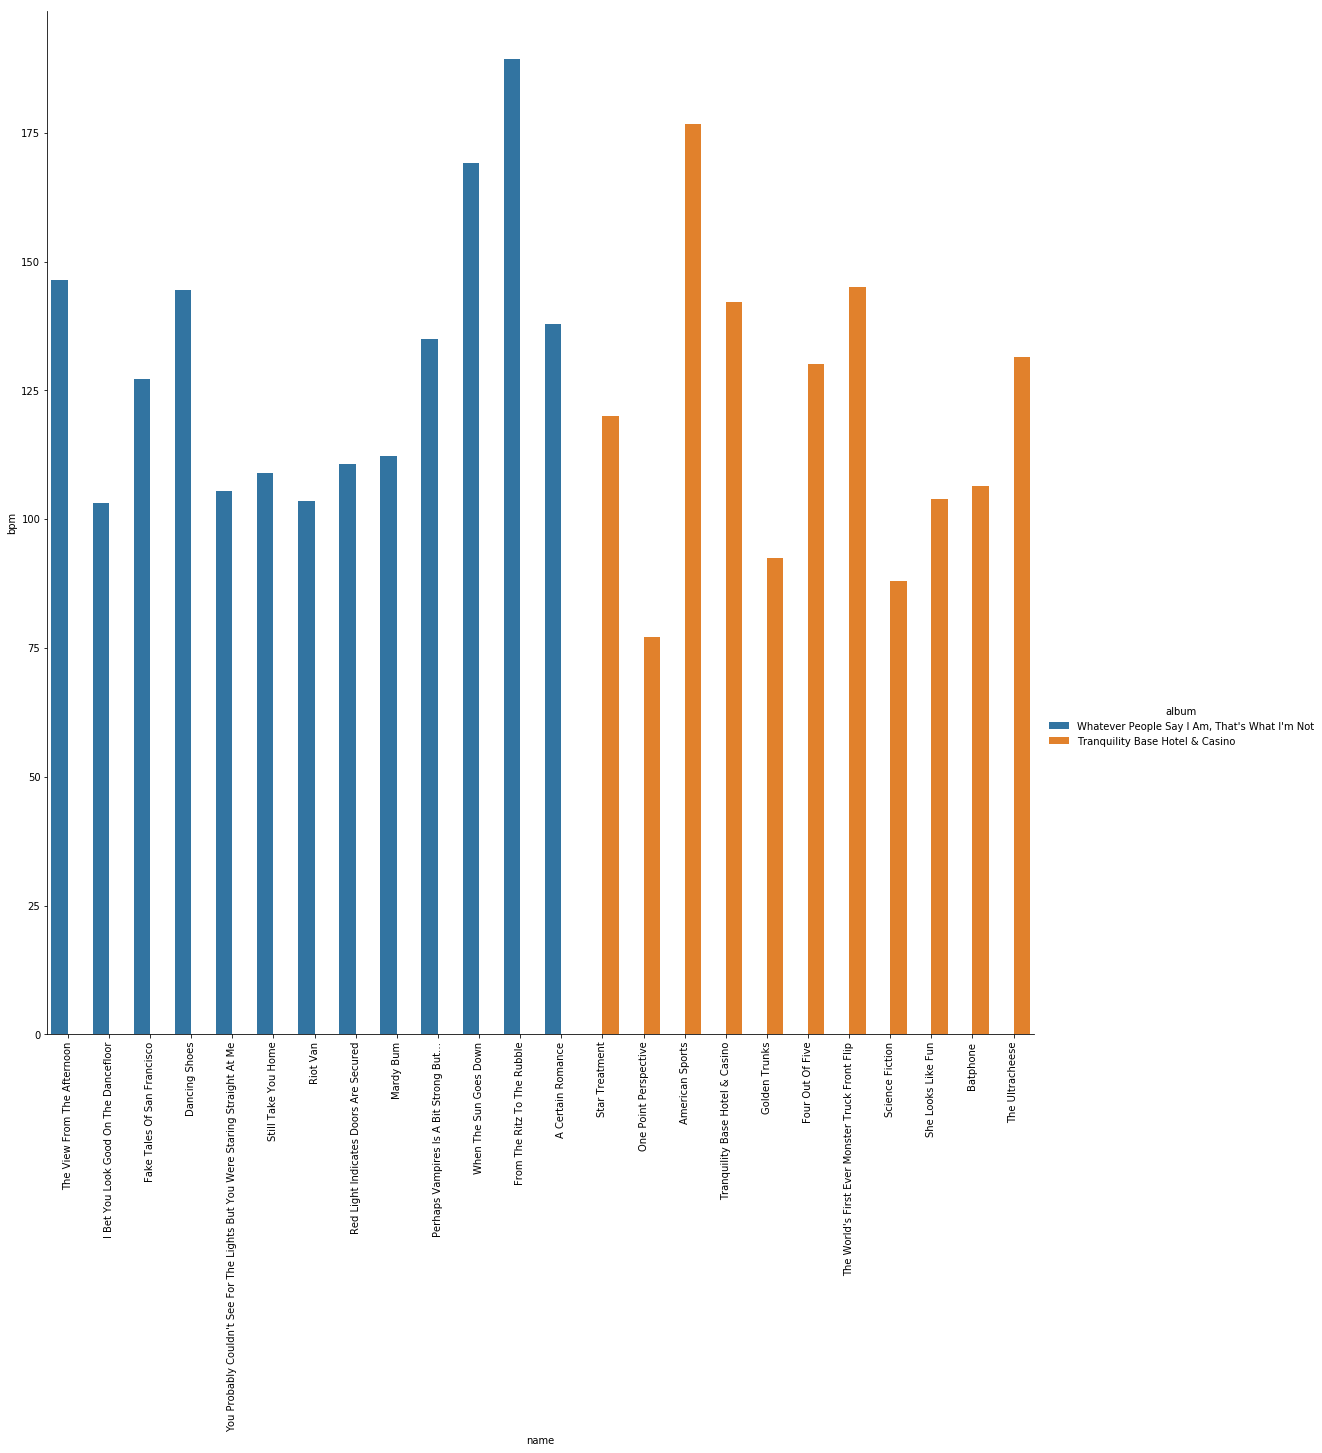

In [10]:
plt.figure(figsize=(20, 15))
g = sns.catplot(x='name', y='bpm', hue='album', kind='bar', data=df, height=15)
g.set_xticklabels(df['name'], rotation=90);

## Energy

<Figure size 1440x1080 with 0 Axes>

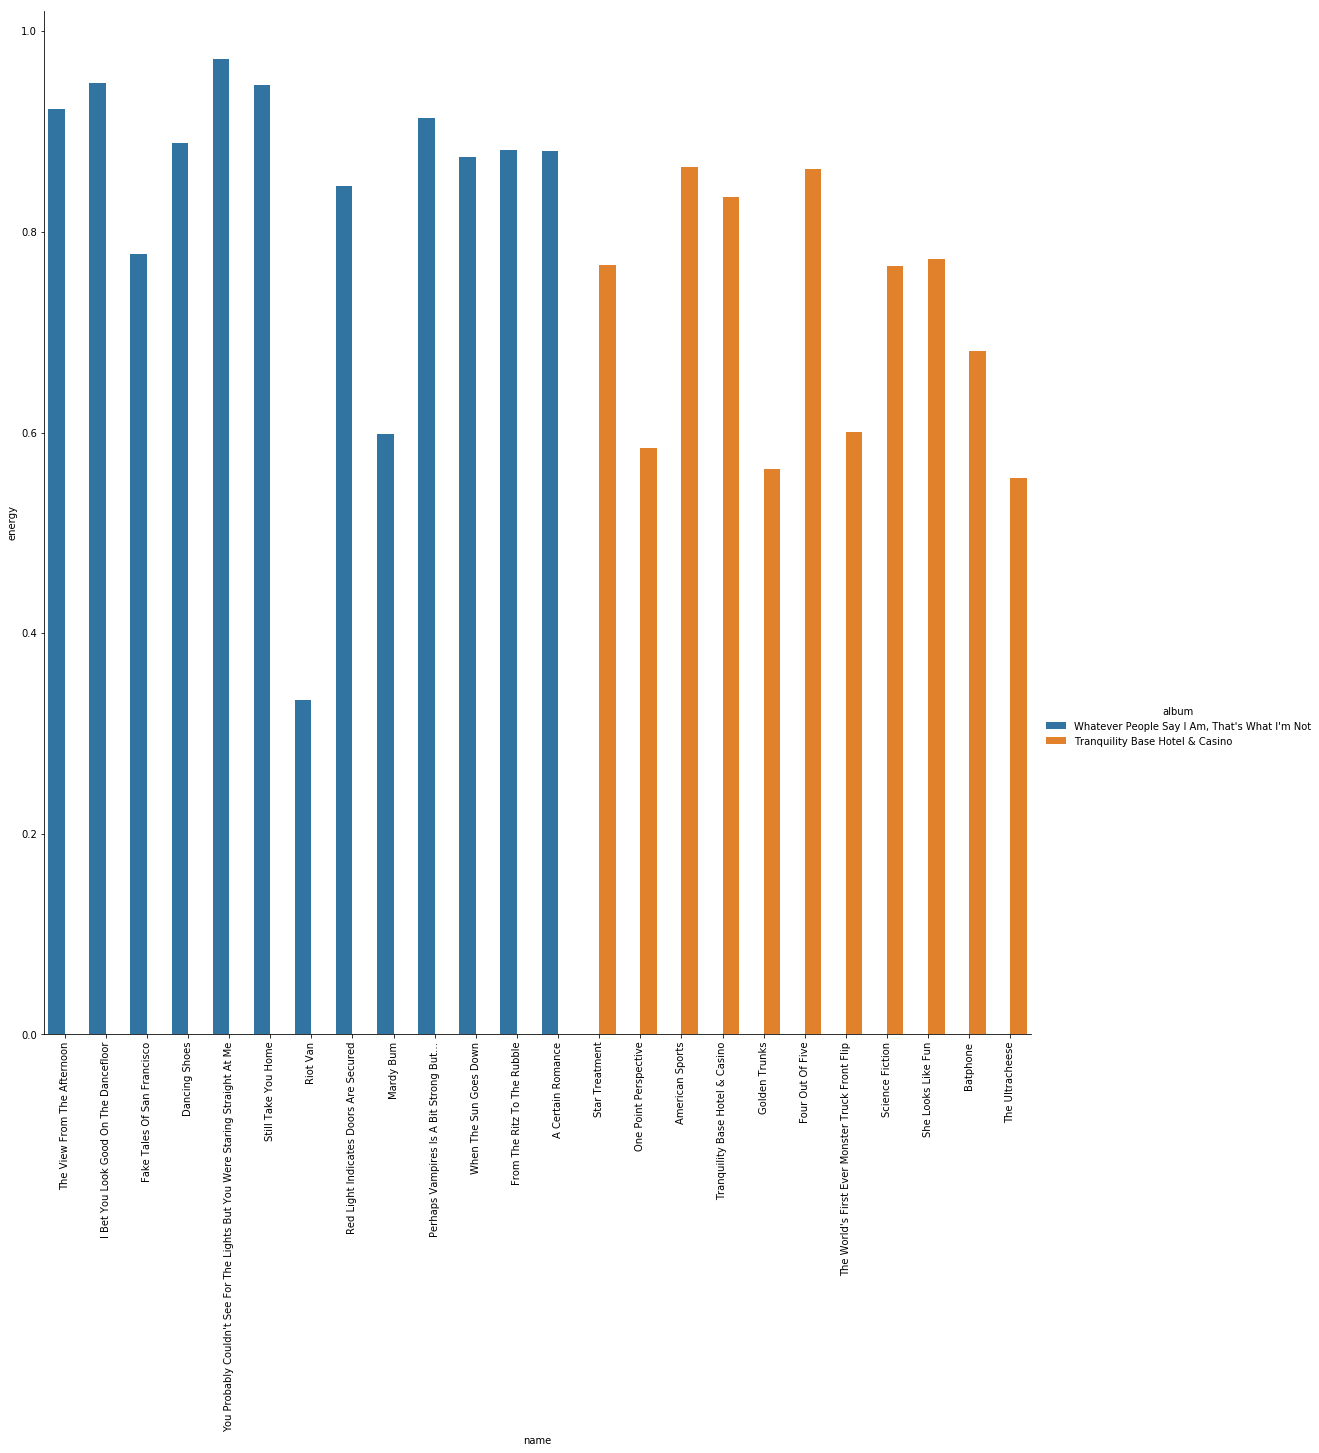

In [11]:
plt.figure(figsize=(20, 15))
g = sns.catplot(x='name', y='energy', hue='album', kind='bar', data=df, height=15)
g.set_xticklabels(df['name'], rotation=90);

## Danceability

<Figure size 1440x1080 with 0 Axes>

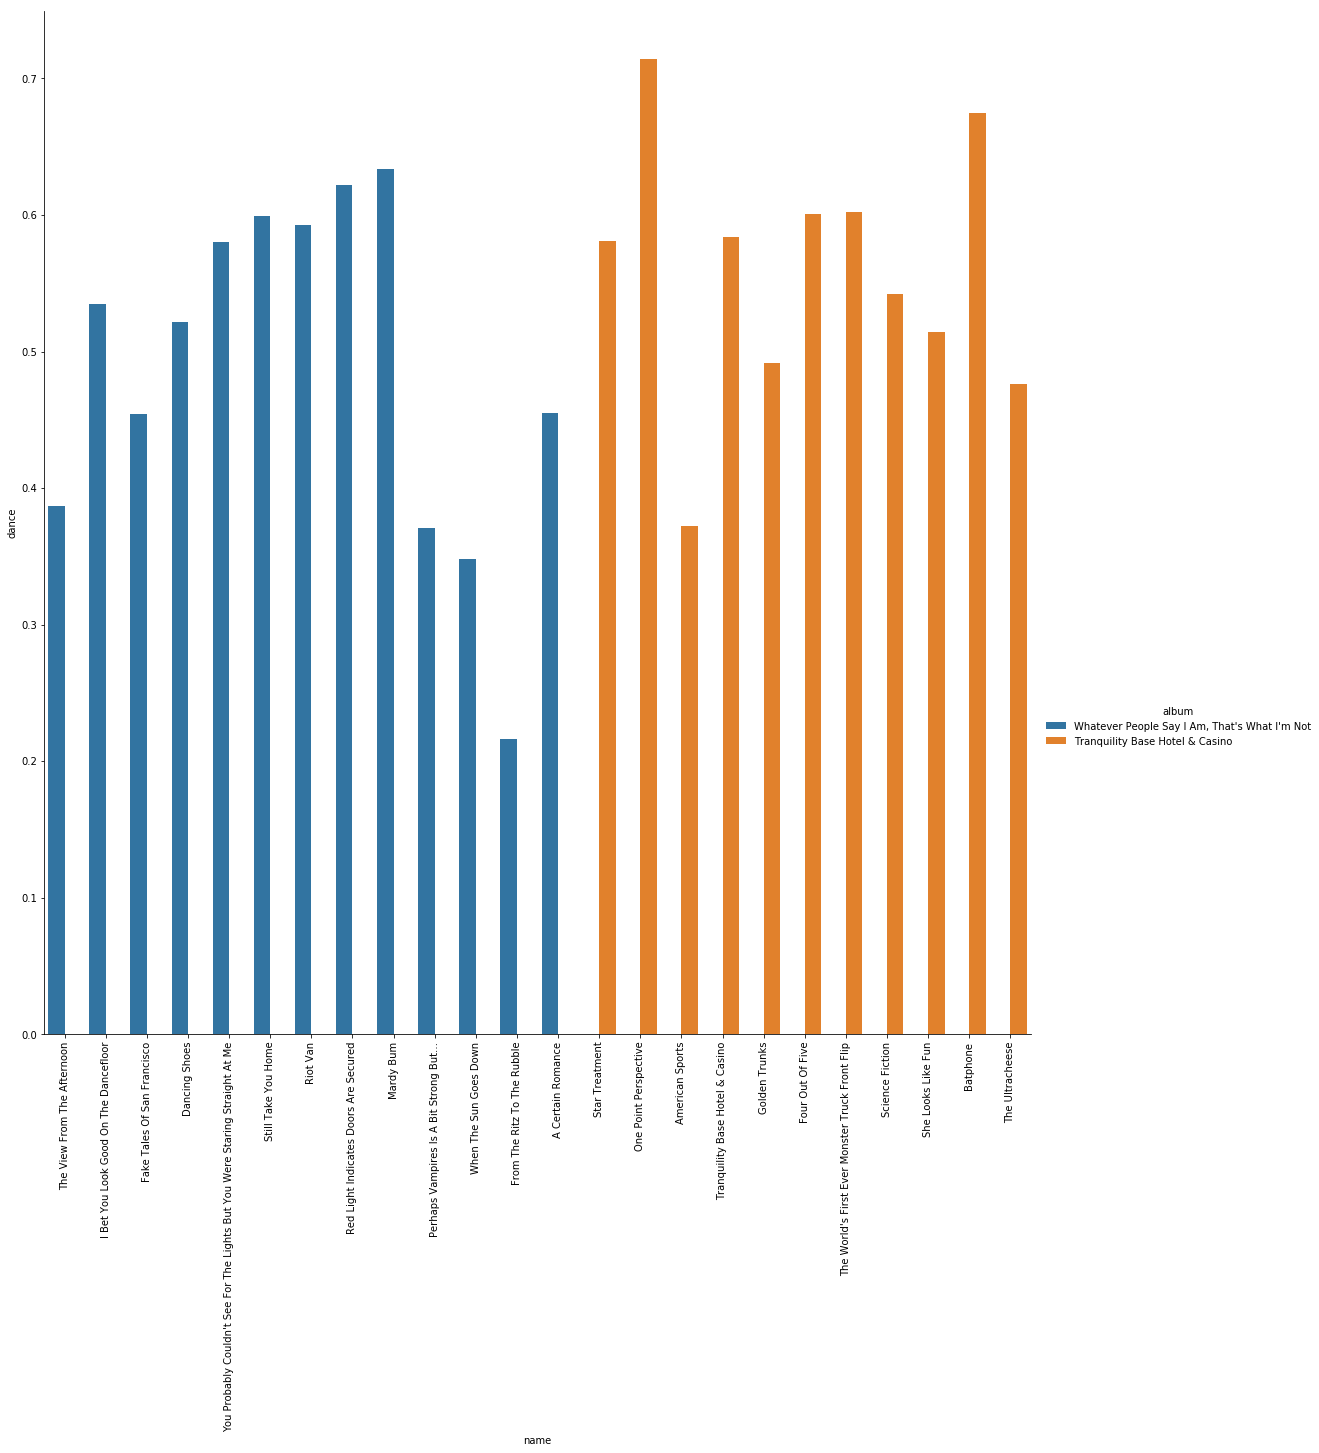

In [12]:
plt.figure(figsize=(20, 15))
g = sns.catplot(x='name', y='dance', hue='album', kind='bar', data=df, height=15)
g.set_xticklabels(df['name'], rotation=90);